# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Web Scrapping Easy (https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel)

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [65]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-07-01#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [66]:
url_get.content[1:777]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n  new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n  j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n  \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n  }'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [67]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [68]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [69]:
table = soup.find('div',attrs={'class':'card-body'})
print(table.prettify()[1:500])

div class="card-body">
 <h1 class="pb-3 card-title text-xl">
  Ethereum USD (Historical Data)
 </h1>
 <div class="card-block">
  <div class="coingecko-table table-responsive" data-controller="historical">
   <div class="tw-flex tw-justify-end tw-items-center">
   </div>
   <div class="tw-flex flex-column flex-md-row tw-justify-end tw-items-end align-items-md-center py-2">
    <div class="py-1 pr-md-2 range-links">
     <a class="mx-1" href="/en/coins/ethereum/historical_data/usd?end_date=2021-1


In [70]:
table.find_all('th',attrs={'scope':'row'})[:5]

[<th class="font-semibold text-center" scope="row">2021-07-01</th>,
 <th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>]

In [71]:
table.find_all('th',attrs={'scope':'row'})[0].text

'2021-07-01'

In [72]:
# mencari baris
row = table.find_all('th',attrs={'scope':'row'})
row_length = len(row)
row_length

548

In [73]:
table.find_all('th',attrs={'class':'text-center'})[4].text

'Close'

In [74]:
table.find_all('th',attrs={'scope':'row'})[:5]

[<th class="font-semibold text-center" scope="row">2021-07-01</th>,
 <th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>]

In [75]:
# mencari kolom
baris = table.find_all('tr')
baris_length = len(baris)
baris_length

549

In [76]:
table.find_all('td',attrs={'class':'text-center'})[:5]

[<td class="text-center">
 $265,951,575,833
 </td>,
 <td class="text-center">
 $29,046,221,906
 </td>,
 <td class="text-center">
 $2,279.35
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $253,607,549,372
 </td>]

In [77]:
table.find_all('tr')[1:2]

[<tr>
 <th class="font-semibold text-center" scope="row">2021-07-01</th>
 <td class="text-center">
 $265,951,575,833
 </td>
 <td class="text-center">
 $29,046,221,906
 </td>
 <td class="text-center">
 $2,279.35
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>]

In [78]:
table.find_all('tr',attrs={'scope':'row'})[:5]

[]

Do the scrapping process here (please change this markdown with your explanation)

In [79]:
temp = [] #initiating a tuple
j = 0

for i in range(1, row_length):
    # get judul
    period = table.find_all('th',attrs={'scope':'row'})[i].text
    
    # get marketcap
    Marketcap = table.find_all('td',attrs={'class':'text-center'})[(i+3)+j].text
    Marketcap = Marketcap.strip()
    j=j+1
    
    # get Volume
    Volume = table.find_all('td',attrs={'class':'text-center'})[(i+3)+j].text
    Volume = Volume.strip()
    j=j+1
    
    # get Open
    Open = table.find_all('td',attrs={'class':'text-center'})[(i+3)+j].text
    Open = Open.strip()
    j=j+1
    
    # get Close
    Close = table.find_all('td',attrs={'class':'text-center'})[(i+3)+j].text
    Close = Close.strip()

    
    temp.append((period,Marketcap,Volume,Open,Close))
    #scrapping process
    
temp 

[('2021-06-30',
  '$253,607,549,372',
  '$27,149,143,847',
  '$2,169.40',
  '$2,279.35'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06

## Creating data frame & Data wrangling

Put the array into dataframe

In [80]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

df = pd.DataFrame(temp, columns=('Date','MarketCap','Volume','Open','Close'))
df.head()

,Date,MarketCap,Volume,Open,Close
0,2021-06-30,"$253,607,549,372","$27,149,143,847","$2,169.40","$2,279.35"
1,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [81]:
df.dtypes


Date         object
MarketCap    object
Volume       object
Open         object
Close        object
dtype: object

In [82]:
df['Date'] = df['Date'].astype('datetime64')
df['MarketCap'] = df['MarketCap'].str.replace(',','')
df['MarketCap'] = df['MarketCap'].str.replace('$','')
df['MarketCap'] = df['MarketCap'].astype('int64')

df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].str.replace('$','')
df['Volume'] = df['Volume'].astype('int64')

df['Open'] = df['Open'].str.replace(',','')
df['Open'] = df['Open'].str.replace('$','')
df['Open'] = df['Open'].astype('float64')

df['Close'] = df['Close'].str.replace(',','')
df['Close'] = df['Close'].str.replace('$','')
df['Close'] = df['Close'].astype('float64')
df.head()

C:\Users\riand\AppData\Local\Temp/ipykernel_16408/3637258301.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MarketCap'] = df['MarketCap'].str.replace('$','')
C:\Users\riand\AppData\Local\Temp/ipykernel_16408/3637258301.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace('$','')
C:\Users\riand\AppData\Local\Temp/ipykernel_16408/3637258301.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace('$','')
C:\Users\riand\AppData\Local\Temp/ipyker

,Date,MarketCap,Volume,Open,Close
0,2021-06-30,253607549372,27149143847,2169.40,2279.35
1,2021-06-29,243040539437,30629329806,2087.52,2169.40
2,2021-06-28,229354016311,24316408028,1973.93,2087.52
3,2021-06-27,209989265221,24249510321,1817.05,1973.93
4,2021-06-26,213871849532,25981381067,1833.46,1817.05


In [83]:
df = df.set_index('Date')

In [84]:
# df['Close'] = (df['Close'] == 'N/A').fillna('2,279.35')
df.head()

,MarketCap,Volume,Open,Close
Date,,,,
2021-06-30,253607549372,27149143847,2169.40,2279.35
2021-06-29,243040539437,30629329806,2087.52,2169.40
2021-06-28,229354016311,24316408028,1973.93,2087.52
2021-06-27,209989265221,24249510321,1817.05,1973.93
2021-06-26,213871849532,25981381067,1833.46,1817.05


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [85]:
df.dtypes

MarketCap      int64
Volume         int64
Open         float64
Close        float64
dtype: object

In [90]:
df["Volume"].mean().round(2)

22445152287.5

<AxesSubplot:xlabel='Date'>

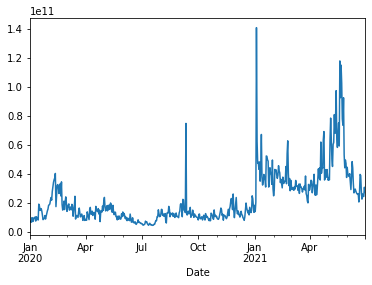

In [86]:
df['Volume'].plot()

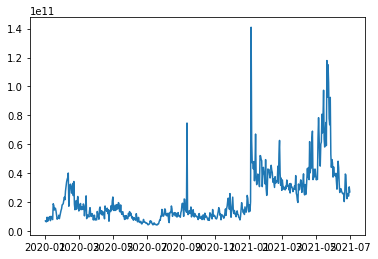

In [87]:
import matplotlib.pyplot as plt
plt.plot(df['Volume'])

(Put your analysis and conclusion here.)
- terdapat 2 bulan dimana kenaikan jumlah volume outlier tertinggi, yaitu di bulan september 2020 dan januari 2021
- volume terendah ada di juli 2020


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.